In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("bank_transactions.csv")

In [3]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [5]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [6]:
data.isnull().sum()
data = data.dropna()

In [7]:
len(data)

19889

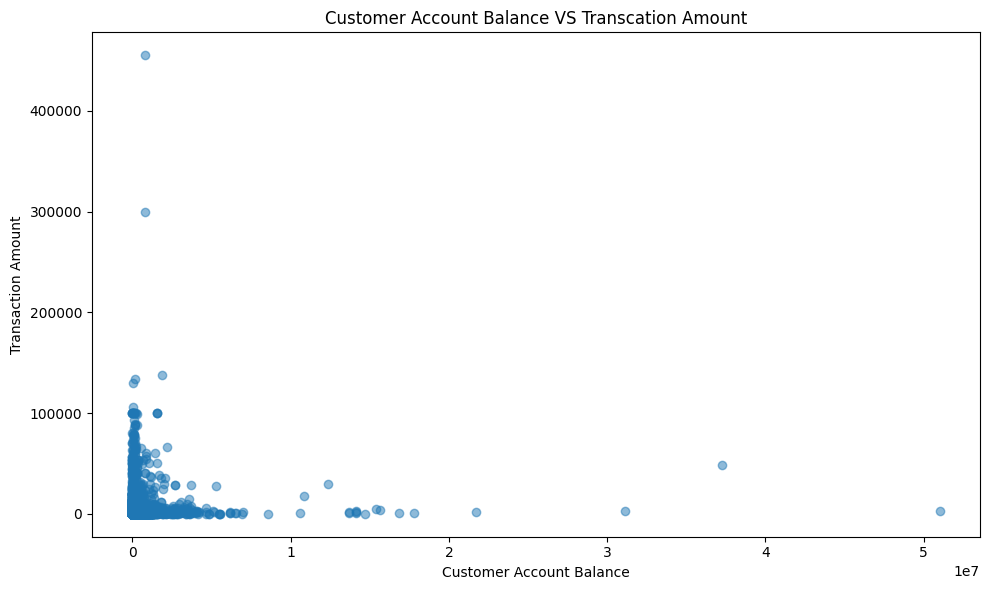

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], alpha=0.5)
plt.title('Customer Account Balance VS Transcation Amount')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()


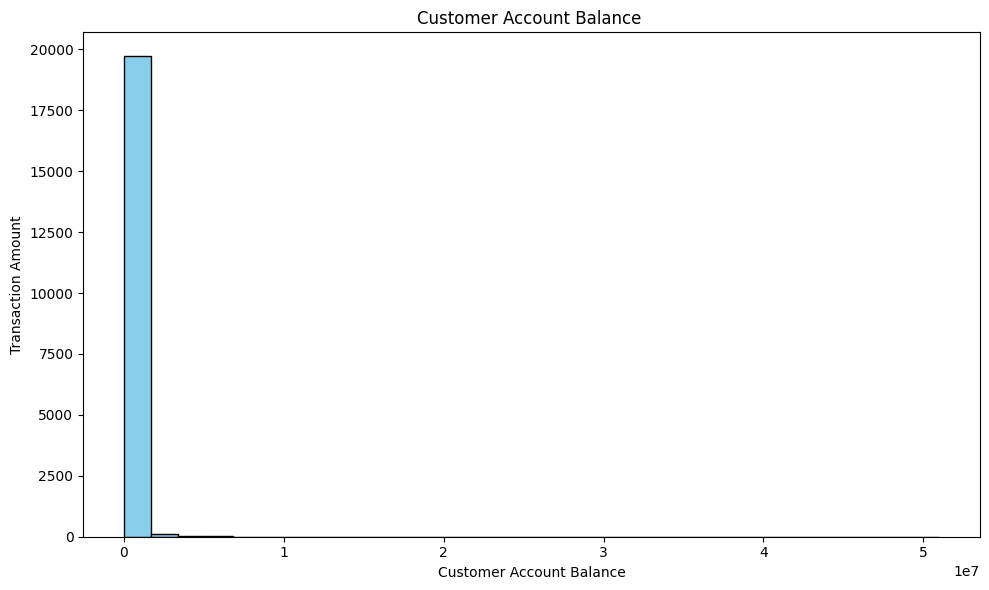

In [9]:
plt.figure(figsize=(10,6))
plt.hist(data['CustAccountBalance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Customer Account Balance ')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

In [10]:
features = ['CustAccountBalance', 'TransactionAmount (INR)']


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

In [12]:
KMeans_model = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
cluster_labels = KMeans_model.fit_predict(scaled_data)
data['Cluster']= cluster_labels

In [13]:
data['Cluster'].unique()

array([0, 2, 1], dtype=int32)

In [14]:
inverse_scaled_centers = scaler.inverse_transform(KMeans_model.cluster_centers_)
inverse_scaled_centers

array([[1.02494824e+05, 1.23612269e+03],
       [1.91160877e+07, 7.08098235e+03],
       [2.76850219e+05, 6.47938097e+04]])

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CustAccountBalance', y='TranscationAmount (INR)', hue='Cluster',data=data, palette='Set1', alpha=0)
plt.scatter(inverse_scaled_centers[:,0], inverse_scaled_centers[:,1], s=300, c='black', markers='X',label='Centroids')
plt.title('K-Means Clustering of Bank Transcations')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount')
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `TranscationAmount (INR)` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [16]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Cluster
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0,0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0,0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0,0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0,0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5,0
...,...,...,...,...,...,...,...,...,...,...
19995,T19996,C2130963,09-08-1989,M,MUMBAI,9961.78,23-09-2016,115919,47.0,0
19996,T19997,C1214583,02-01-1987,M,KOLKATA,7120.57,23-09-2016,115831,300.0,0
19997,T19998,C4739783,11-02-1970,M,MUMBAI,118130.78,23-09-2016,193238,3400.0,0
19998,T19999,C4532552,21-02-1993,M,DELHI,13226.06,23-09-2016,195759,500.0,0


In [17]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_data, data['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.9474916865386365


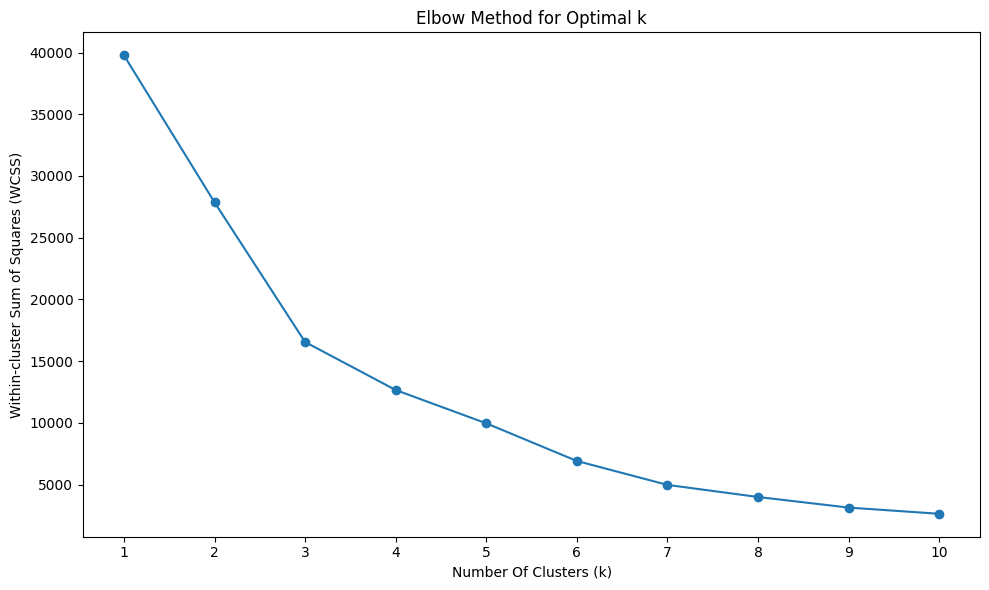

In [20]:
wcss = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number Of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.tight_layout()
plt.show()


In [24]:
sil_scores = []
k_range = range(2,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data,cluster_labels)
    sil_scores.append(score)